### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график  
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Точечный график:

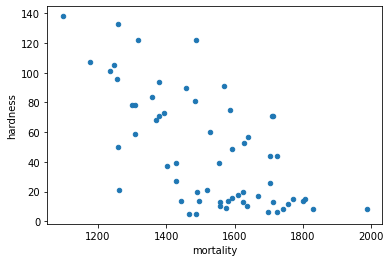

In [3]:
df.plot(kind='scatter', x='mortality', y='hardness')

Коэффициенты корреляции Пирсона и Спирмена

In [4]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Модель линейной регрессии

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df[['mortality']]
y = df['hardness']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [10]:
X_train.shape

(42, 1)

In [11]:
y_train.shape

(42,)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.coef_

array([-0.13817796])

In [14]:
model.intercept_

254.67041251527195

In [15]:
y_pred = model.predict(X_test)
y_pred

array([-19.88920071,  55.1414334 , 103.22736466,  34.82927279,
        37.86918798,  20.32058663,  62.3266875 ,  18.52427311,
        57.35228082,  92.31130555,  83.88244979,  36.21105242,
        19.49151885,  64.26117899,   5.95007844,  28.05855258,
         4.9828327 ,  64.12300102,  52.10151821])

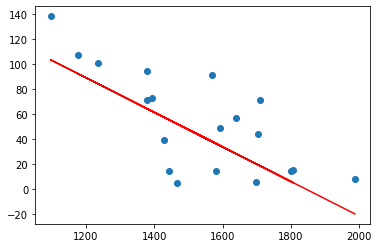

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [17]:
model.score(X_test, y_test)

0.461341908503096

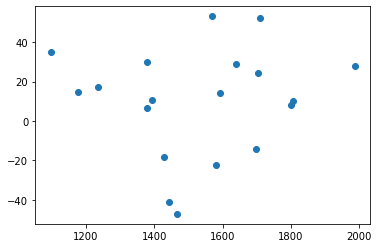

In [18]:
plt.scatter(X_test, y_test - y_pred)

### 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?  

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [33]:
# Группа North
df_n = df.loc[df.location == 'North']
df_n.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


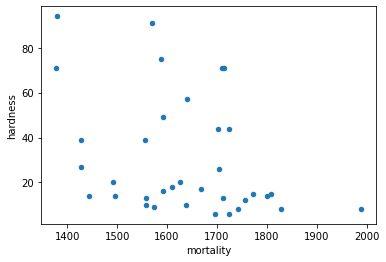

In [20]:
df_n.plot(kind='scatter', x='mortality', y='hardness')

In [21]:
df_n[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [22]:
df_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [23]:
X_n = df_n[['mortality']]
y_n = df_n['hardness']

In [24]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.30, random_state=5)

In [25]:
Xn_train.shape

(24, 1)

In [26]:
yn_train.shape

(24,)

In [27]:
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)

LinearRegression()

In [28]:
yn_pred = model_n.predict(Xn_test)
yn_pred

array([29.47475111, 24.54457141, 36.69394281, 23.84026002, 48.22704175,
       29.73886788, 27.00966126, 24.01633787, 23.22398756, 22.16752048,
       23.4000654 ])

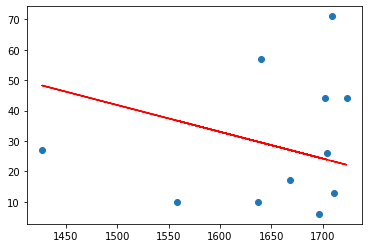

In [29]:
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')

In [30]:
model_n.score(Xn_test, yn_test)

-0.2890779600801934

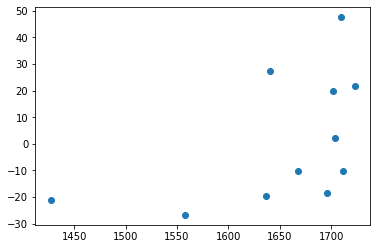

In [31]:
plt.scatter(Xn_test, yn_test - yn_pred)

In [32]:
# Группа South
df_s = df.loc[df.location == 'South']
df_s.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


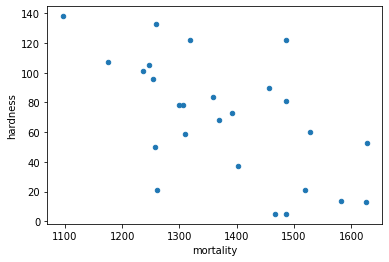

In [34]:
df_s.plot(kind='scatter', x='mortality', y='hardness')

In [35]:
df_s[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [36]:
df_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [37]:
X_s = df_s[['mortality']]
y_s = df_s['hardness']

In [38]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.30, random_state=5)

In [39]:
model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)

LinearRegression()

In [40]:
ys_pred = model_s.predict(Xs_test)
ys_pred

array([ 42.4675822 ,  71.6964789 ,  84.6459901 ,  65.59170934,
        92.41569682, 122.19957257,  96.30055018,  50.23728892])

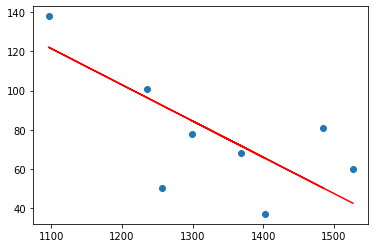

In [41]:
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')

In [42]:
model_s.score(Xs_test, ys_test)

0.4010334293258293

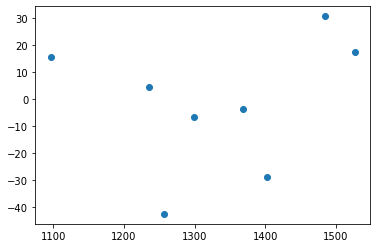

In [43]:
plt.scatter(Xs_test, ys_test - ys_pred)

На основании полученных значений регрессий можем утверждать, что для южной части городов зависимость смертности от жесткости воды соответствует такой же зависимости при анализе общих данных.  
А зависимость для северной части городов отличается в меньшую сторону, возможно в этих городах в большей степени играют роль другие факторы.